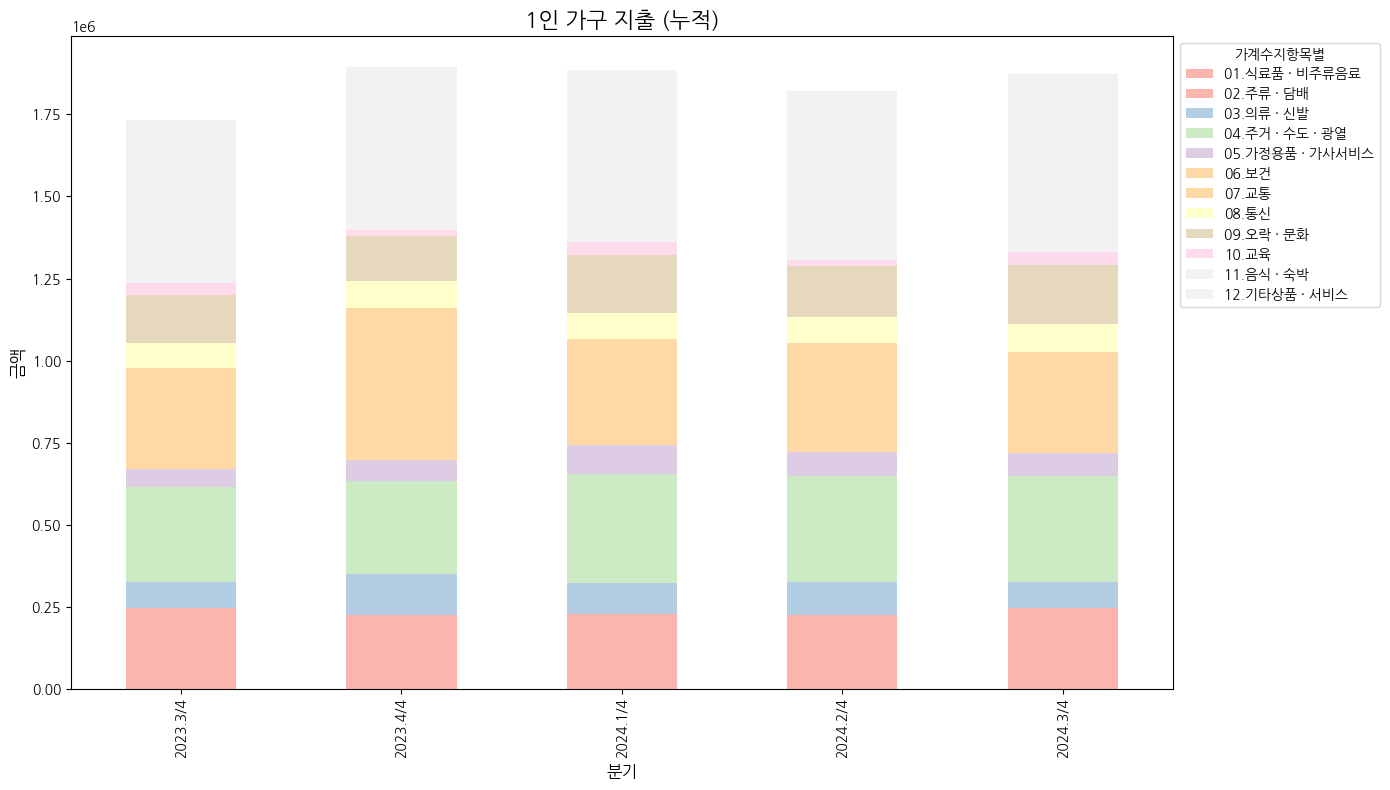

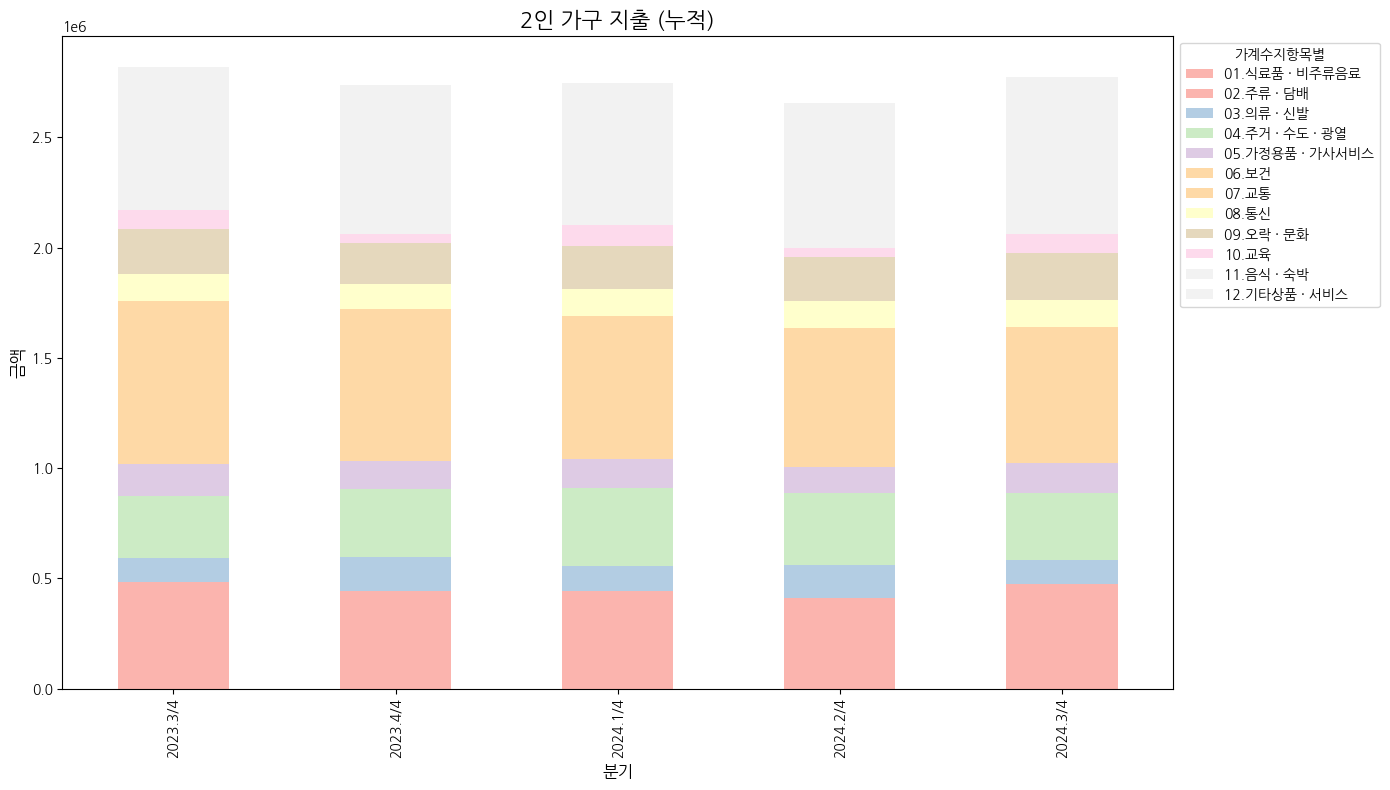

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
# 데이터 읽기
file_path = '../data/csv/house_member_usemoney.csv'  # 파일 경로
use_money = pd.read_csv(file_path)
# 열 이름 정리
use_money.columns = ['가구원수별', '가계수지항목별', '2023.3/4', '2023.4/4', '2024.1/4', '2024.2/4', '2024.3/4']
# 가구원별 데이터 분리
data_1인 = use_money[use_money['가구원수별'] == '1인']
data_2인 = use_money[use_money['가구원수별'] == '2인']
# 소비지출 항목을 제외한 데이터로 변환
def prepare_data(data):
    # '소비지출' 항목을 제외
    data_filtered = data[data['가계수지항목별'] != '소비지출']
    melted_data = data_filtered.melt(
        id_vars=['가구원수별', '가계수지항목별'],
        var_name='분기',
        value_name='금액'
    )
    return melted_data
# Seaborn을 사용해 누적 바 차트 그리기
def plot_stacked_bar_chart(data, title):
    pivot_data = data.pivot_table(
        index='분기',
        columns='가계수지항목별',
        values='금액',
        aggfunc='sum',
        fill_value=0
    )
    pivot_data.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 8),
        colormap='Pastel1'
    )
    plt.title(title, fontsize=16)
    plt.xlabel('분기', fontsize=12)
    plt.ylabel('금액', fontsize=12)
    plt.legend(title='가계수지항목별', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()
# 1인 가구 데이터 준비 및 시각화
melted_data_1인 = prepare_data(data_1인)
plot_stacked_bar_chart(melted_data_1인, '1인 가구 지출 (누적)')
# 2인 가구 데이터 준비 및 시각화
melted_data_2인 = prepare_data(data_2인)
plot_stacked_bar_chart(melted_data_2인, '2인 가구 지출 (누적)')

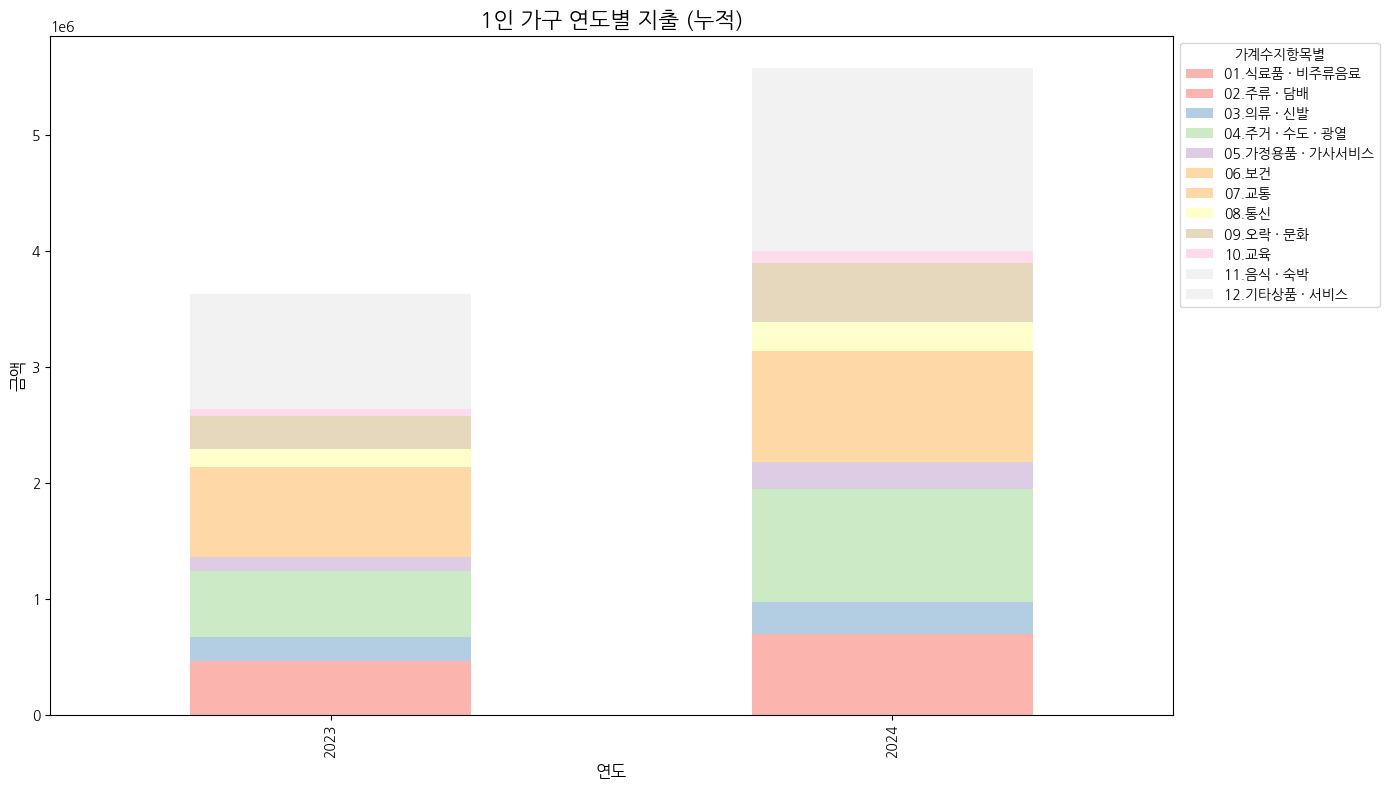

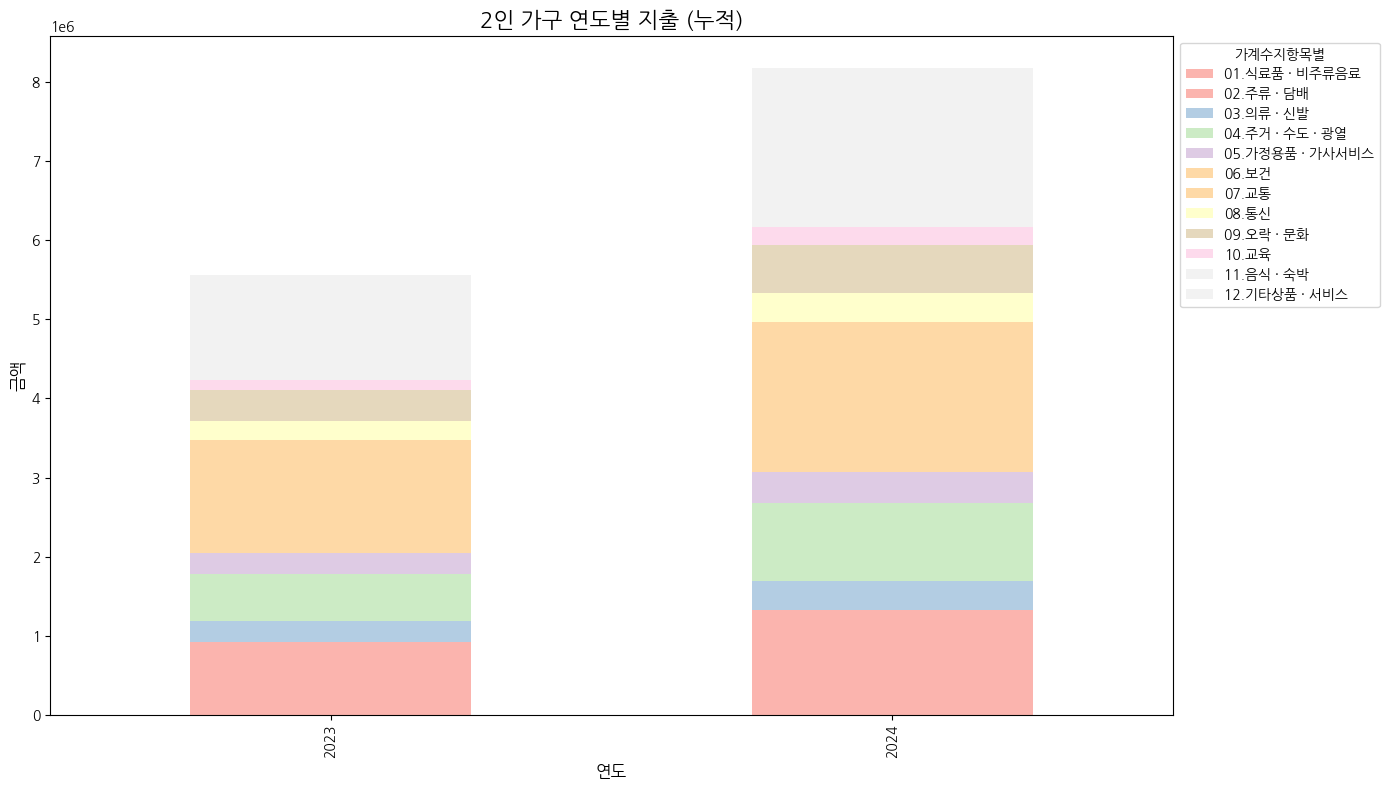

In [16]:
# 연도별 데이터 합산
def prepare_data_annual(data):
    # '소비지출' 항목을 제외
    data_filtered = data[data['가계수지항목별'] != '소비지출']
    # 연도 추출 및 그룹화 준비
    data_filtered['연도'] = data_filtered['분기'].str.split('.').str[0]
    annual_data = data_filtered.groupby(['가구원수별', '가계수지항목별', '연도'], as_index=False)['금액'].sum()
    return annual_data

# 연도별 누적 바 차트 그리기
def plot_annual_stacked_bar_chart(data, title):
    pivot_data = data.pivot_table(
        index='연도',
        columns='가계수지항목별',
        values='금액',
        aggfunc='sum',
        fill_value=0
    )
    pivot_data.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 8),
        colormap='Pastel1'
    )
    plt.title(title, fontsize=16)
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('금액', fontsize=12)
    plt.legend(title='가계수지항목별', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# 1인 가구 연도별 데이터 준비 및 시각화
annual_data_1인 = prepare_data_annual(melted_data_1인)
plot_annual_stacked_bar_chart(annual_data_1인, '1인 가구 연도별 지출 (누적)')

# 2인 가구 연도별 데이터 준비 및 시각화
annual_data_2인 = prepare_data_annual(melted_data_2인)
plot_annual_stacked_bar_chart(annual_data_2인, '2인 가구 연도별 지출 (누적)')


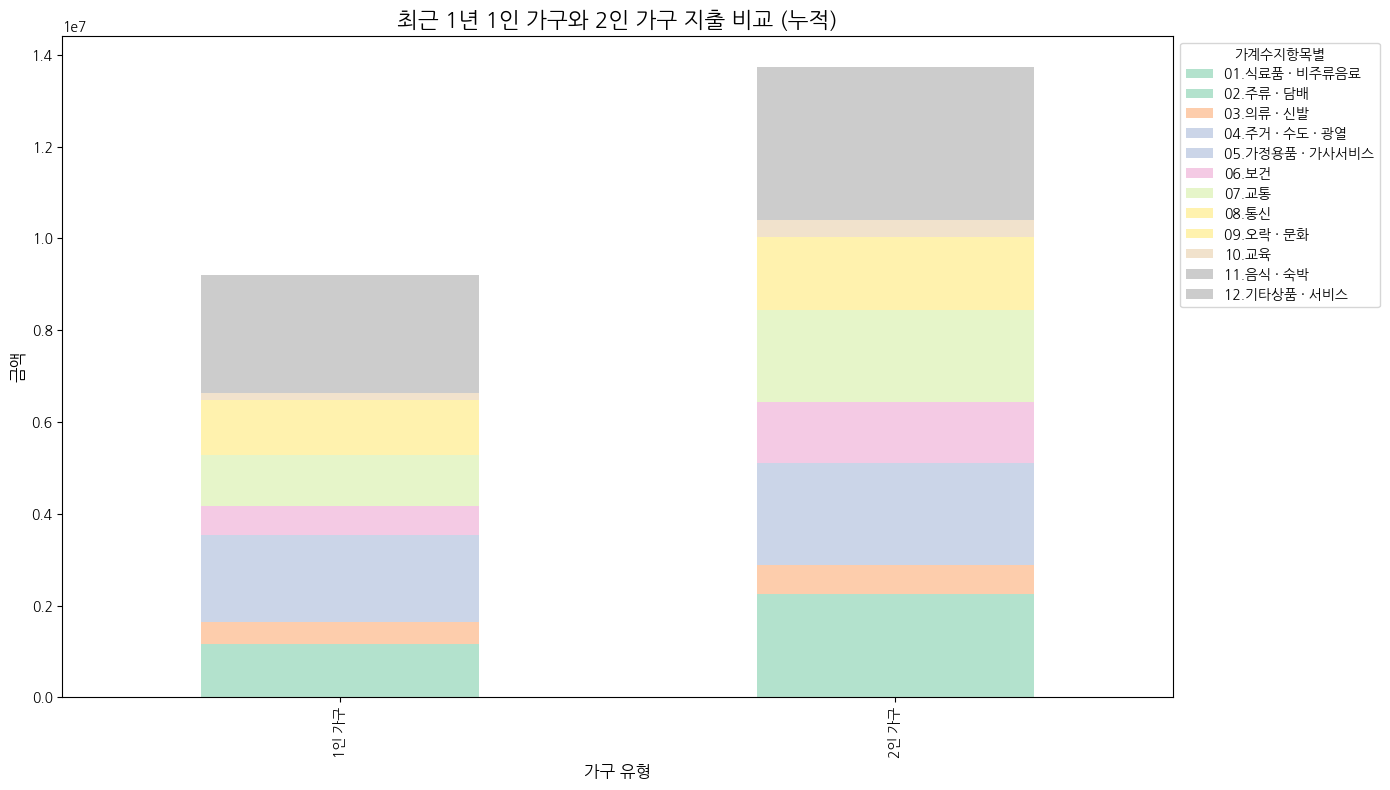

In [17]:
# 모든 연도 데이터를 합산
def prepare_data_combined(data, group_name):
    # '소비지출' 항목을 제외
    data_filtered = data[data['가계수지항목별'] != '소비지출']
    # 그룹 이름 추가
    data_filtered['가구'] = group_name
    # 금액 합산
    combined_data = data_filtered.groupby(['가구', '가계수지항목별'], as_index=False)['금액'].sum()
    return combined_data

# 1인 가구와 2인 가구 데이터 합치기
combined_data_1인 = prepare_data_combined(melted_data_1인, '1인 가구')
combined_data_2인 = prepare_data_combined(melted_data_2인, '2인 가구')
combined_data = pd.concat([combined_data_1인, combined_data_2인])

# 두 가구 데이터를 비교하는 누적 바 차트 그리기
def plot_combined_stacked_bar_chart(data, title):
    pivot_data = data.pivot_table(
        index='가구',
        columns='가계수지항목별',
        values='금액',
        aggfunc='sum',
        fill_value=0
    )
    pivot_data.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 8),
        colormap='Pastel2'
    )
    plt.title(title, fontsize=16)
    plt.xlabel('가구 유형', fontsize=12)
    plt.ylabel('금액', fontsize=12)
    plt.legend(title='가계수지항목별', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# 가구 비교 그래프 시각화
plot_combined_stacked_bar_chart(combined_data, '최근 1년 1인 가구와 2인 가구 지출 비교 (누적)')


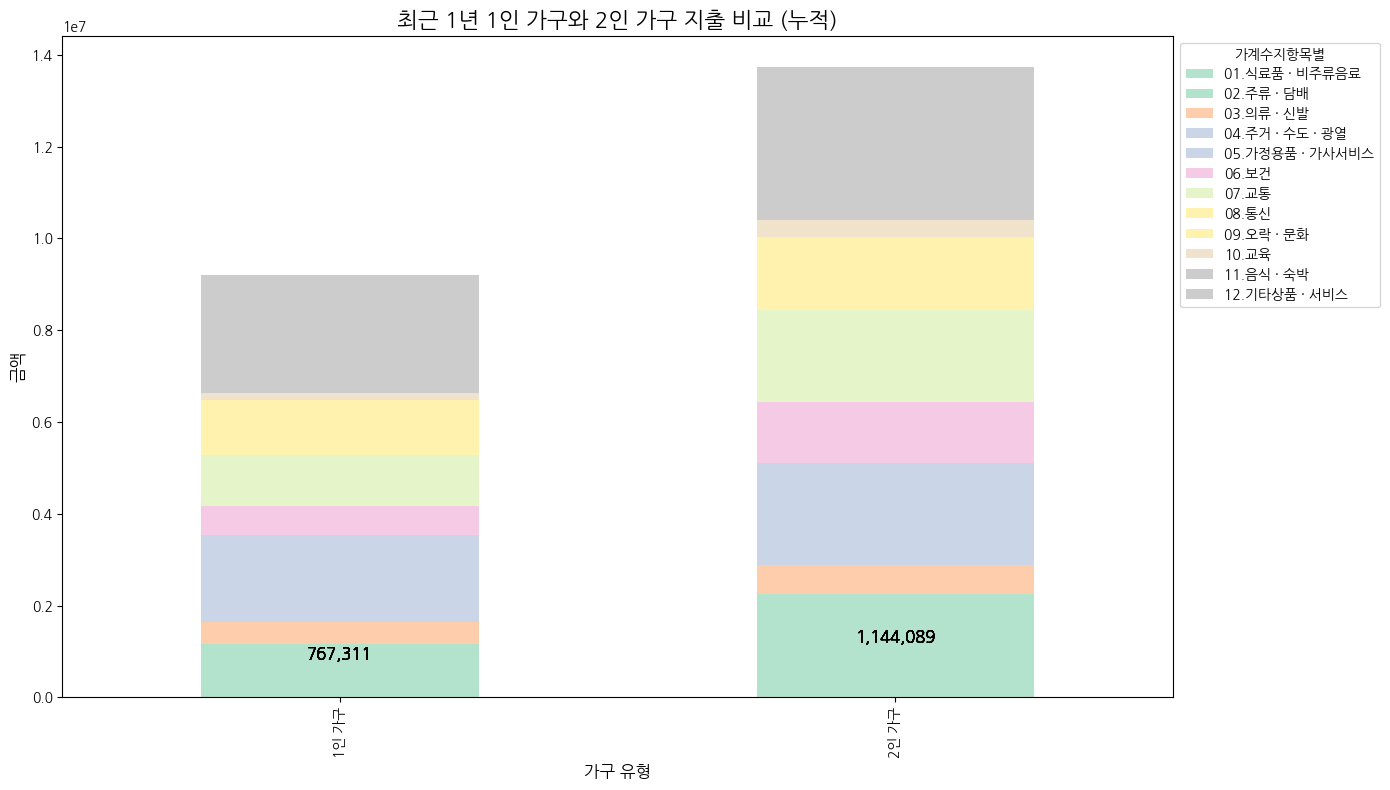

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 준비 함수
def prepare_data_combined(data, group_name):
    # '소비지출' 항목을 제외
    data_filtered = data[data['가계수지항목별'] != '소비지출']
    # 그룹 이름 추가
    data_filtered['가구'] = group_name
    # 금액 합산
    combined_data = data_filtered.groupby(['가구', '가계수지항목별'], as_index=False)['금액'].sum()
    return combined_data

# 1인 가구와 2인 가구 데이터 합치기
combined_data_1인 = prepare_data_combined(melted_data_1인, '1인 가구')
combined_data_2인 = prepare_data_combined(melted_data_2인, '2인 가구')
combined_data = pd.concat([combined_data_1인, combined_data_2인])

# 두 가구 데이터를 비교하는 누적 바 차트 그리기
def plot_combined_stacked_bar_chart(data, title):
    # 피벗 테이블을 생성
    pivot_data = data.pivot_table(
        index='가구',
        columns='가계수지항목별',
        values='금액',
        aggfunc='sum',
        fill_value=0
    )

    # 그래프 그리기
    ax = pivot_data.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 8),
        colormap='Pastel2'
    )
    
    # 제목과 라벨 설정
    plt.title(title, fontsize=16)
    plt.xlabel('가구 유형', fontsize=12)
    plt.ylabel('금액', fontsize=12)
    
    # 범례 설정
    plt.legend(title='가계수지항목별', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
    
    # 각 가구별 합계를 계산하여 표시
    for i, p in enumerate(ax.patches):
        # 각 막대의 누적 합계
        total = sum(p.get_height() for p in ax.patches if p.get_x() == ax.patches[i].get_x())/12
        # x, y 좌표 (각 가구의 막대 끝 위치)
        ax.text(p.get_x() + p.get_width() / 2, total, f'{total:,.0f}', ha='center', va='bottom', fontsize=12, color='black')

    # 레이아웃 조정
    plt.tight_layout()
    plt.show()

# 가구 비교 그래프 시각화
plot_combined_stacked_bar_chart(combined_data, '최근 1년 1인 가구와 2인 가구 지출 비교 (누적)')
